In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.backend import set_image_data_format 
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input 
from tensorflow.keras import optimizers, losses, utils 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


### Transforms:
https://link.springer.com/content/pdf/bbm%3A978-1-4842-3516-4%2F1.pdf

In [14]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        #zca_whitening=True,
        #featurewise_center=True,
        vertical_flip=True,
        rescale = 1./255,
        validation_split=0.15,
        fill_mode="nearest")

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

In [15]:
training = datagen.flow_from_directory(directory = "data/",
                                   target_size = (64,64),
                                   color_mode="rgb",
                                   class_mode = "categorical",
                                   batch_size = 256,
                                   subset='training',
                                   seed=117)

Found 22950 images belonging to 10 classes.


In [16]:
validation = datagen.flow_from_directory(directory = "data/",
                                   target_size = (64,64),
                                   color_mode="rgb",
                                   class_mode = "categorical",
                                   batch_size = 256,
                                   subset='validation',
                                   seed=117)

Found 4050 images belonging to 10 classes.


In [7]:
training.class_indices

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [ ]:
plt.imshow(training[13][0][52])

In [ ]:
#Unused old block 
X=[]
y=[]

In [ ]:
#Unused old block 
files = glob.glob("data/Highway/*.jpg")
for file in files:
    img = np.asarray(Image.open(file))
    X.append(img)
    y.append('Highway')

In [ ]:
#Unused old block 
X=np.asarray(X)

In [ ]:
#Unused old block 
plt.imshow(X[4567].reshape(64, 64,3),cmap='Greens')

In [ ]:
#Unused old block 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

In [ ]:
#Unused old block 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#Unused old block 
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
#Unused old block 
le.classes_

In [195]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(64, 64, 3)))
cnn_model.add(Conv2D(filters = 10,            
                     kernel_size = 3,       
                     activation='relu'),)
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters = 7,            
                     kernel_size = 3,       
                     activation='relu'),)
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(5,
                     kernel_size=3,
                     activation='relu'),
             )
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(40, activation='relu'))
cnn_model.add(BatchNormalization())
#cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(20, activation='relu'))
cnn_model.add(BatchNormalization())
#cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(15, activation='relu'))
#cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(len(training.class_indices), activation='softmax'))

In [196]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 7)         637       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 7)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 7)         28        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 5)         320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 5)          

In [197]:

cnn_model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [198]:
callbacks = [
    EarlyStopping(patience=10, verbose=1, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model_best_2.h5', verbose=1, save_best_only=True, monitor='val_accuracy')
]

In [200]:
history = cnn_model.fit_generator(generator=training, 
                    validation_data=validation,
                    callbacks=callbacks,
                    epochs=50,
                    verbose=1)

Epoch 1/50
89/90 [============================>.] - ETA: 0s - loss: 2.0032 - accuracy: 0.2795
Epoch 00001: val_accuracy improved from -inf to 0.08642, saving model to model_best_2.h5
90/90 [==============================] - 76s 843ms/step - loss: 2.0007 - accuracy: 0.2807 - val_loss: 2.2879 - val_accuracy: 0.0864
Epoch 2/50
89/90 [============================>.] - ETA: 0s - loss: 1.7207 - accuracy: 0.4016
Epoch 00002: val_accuracy improved from 0.08642 to 0.12864, saving model to model_best_2.h5
90/90 [==============================] - 68s 756ms/step - loss: 1.7194 - accuracy: 0.4020 - val_loss: 2.2619 - val_accuracy: 0.1286
Epoch 3/50
89/90 [============================>.] - ETA: 0s - loss: 1.5390 - accuracy: 0.4683
Epoch 00003: val_accuracy did not improve from 0.12864
90/90 [==============================] - 69s 765ms/step - loss: 1.5374 - accuracy: 0.4690 - val_loss: 2.3038 - val_accuracy: 0.0867
Epoch 4/50
89/90 [============================>.] - ETA: 0s - loss: 1.4044 - accuracy:

Epoch 28/50
89/90 [============================>.] - ETA: 0s - loss: 0.7007 - accuracy: 0.7431
Epoch 00028: val_accuracy improved from 0.74593 to 0.75235, saving model to model_best_2.h5
90/90 [==============================] - 68s 751ms/step - loss: 0.6994 - accuracy: 0.7437 - val_loss: 0.7140 - val_accuracy: 0.7523
Epoch 29/50
89/90 [============================>.] - ETA: 0s - loss: 0.6980 - accuracy: 0.7465
Epoch 00029: val_accuracy did not improve from 0.75235
90/90 [==============================] - 66s 735ms/step - loss: 0.6980 - accuracy: 0.7464 - val_loss: 0.8442 - val_accuracy: 0.6988
Epoch 30/50
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.7507
Epoch 00030: val_accuracy did not improve from 0.75235
90/90 [==============================] - 67s 747ms/step - loss: 0.6837 - accuracy: 0.7508 - val_loss: 0.7260 - val_accuracy: 0.7373
Epoch 31/50
89/90 [============================>.] - ETA: 0s - loss: 0.6794 - accuracy: 0.7539
Epoch 00031: val_accur

In [78]:
history = cnn_model.fit_generator( generator=training, 
                    validation_data=validation,
                    callbacks=callbacks,    
                    epochs=30,
                    verbose=1)

Epoch 1/30
89/90 [============================>.] - ETA: 0s - loss: 0.9228 - accuracy: 0.6656
Epoch 00001: val_accuracy improved from 0.64938 to 0.66765, saving model to model-best.h5
90/90 [==============================] - 84s 939ms/step - loss: 0.9221 - accuracy: 0.6658 - val_loss: 0.9135 - val_accuracy: 0.6677
Epoch 2/30
89/90 [============================>.] - ETA: 0s - loss: 0.8917 - accuracy: 0.6767
Epoch 00002: val_accuracy improved from 0.66765 to 0.69037, saving model to model-best.h5
90/90 [==============================] - 81s 895ms/step - loss: 0.8910 - accuracy: 0.6772 - val_loss: 0.8769 - val_accuracy: 0.6904
Epoch 3/30
89/90 [============================>.] - ETA: 0s - loss: 0.8857 - accuracy: 0.6826
Epoch 00003: val_accuracy did not improve from 0.69037
90/90 [==============================] - 80s 887ms/step - loss: 0.8850 - accuracy: 0.6829 - val_loss: 0.8581 - val_accuracy: 0.6859
Epoch 4/30
89/90 [============================>.] - ETA: 0s - loss: 0.8586 - accuracy: 

In [113]:
history = cnn_model.fit_generator( generator=training, 
                    validation_data=validation,
                    callbacks=callbacks,    
                    epochs=10,
                    verbose=1)

Epoch 1/10
89/90 [============================>.] - ETA: 0s - loss: 0.7445 - accuracy: 0.7316
Epoch 00001: val_accuracy did not improve from 0.74025
90/90 [==============================] - 83s 926ms/step - loss: 0.7447 - accuracy: 0.7312 - val_loss: 0.7552 - val_accuracy: 0.7284
Epoch 2/10
89/90 [============================>.] - ETA: 0s - loss: 0.7183 - accuracy: 0.7379
Epoch 00002: val_accuracy did not improve from 0.74025
90/90 [==============================] - 97s 1s/step - loss: 0.7178 - accuracy: 0.7383 - val_loss: 0.7478 - val_accuracy: 0.7311
Epoch 3/10
89/90 [============================>.] - ETA: 0s - loss: 0.7304 - accuracy: 0.7332
Epoch 00003: val_accuracy did not improve from 0.74025
90/90 [==============================] - 88s 972ms/step - loss: 0.7290 - accuracy: 0.7335 - val_loss: 0.7533 - val_accuracy: 0.7336
Epoch 4/10
89/90 [============================>.] - ETA: 0s - loss: 0.7206 - accuracy: 0.7363
Epoch 00004: val_accuracy did not improve from 0.74025
90/90 [====

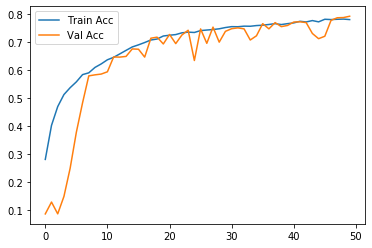

In [201]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],  label='Val Acc')
plt.legend()

In [176]:
img = Image.open('data/AnnualCrop/AnnualCrop_667.jpg')

In [177]:
img =img.convert('RGB')

In [178]:
img_temp=img.resize((64,64))

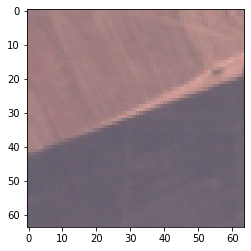

In [179]:
plt.imshow(img_temp)

In [180]:
img=np.asarray(img_temp, dtype='float32')
img=img.reshape(1,64,64,3)

In [181]:
cnn_model.predict_classes(img)

array([8])

In [182]:
training.class_indices

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}